In [1]:
#!pip3 install mysql-connector-python
#!pip3 install ipynb


### import necessary libraries

In [2]:
#!/usr/bin/env python
# coding: utf-8
import warnings
warnings.filterwarnings('ignore')

In [3]:
import datetime
import numpy as np
import math
import mysql.connector as sql
import pandas as pd

### Grab data for analysis from database

In [4]:
db_connection = sql.connect(host='localhost', database='mine', user='root', password='pz1033iD@')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Flight')
table_rows = db_cursor.fetchall()
df_all = pd.DataFrame(table_rows)

### Set up datasets for training/testing

In [5]:
print(df_all[3].min())
print(df_all[3].max())
min_date = df_all[3].min()
max_date = df_all[3].max()
num_day = (df_all[3].max()-df_all[3].min()).days
# seperate data as form of weeks
math.ceil(num_day/7)

2019-09-01
2020-09-30


57

In [6]:
df_analysis = df_all[[3,6]]
df_analysis.columns = ['date','cancelled']

In [7]:
df_analysis.head(10)

,date,cancelled
0,2020-04-05,1.00
1,2020-04-05,1.00
2,2020-04-06,1.00
3,2020-04-06,1.00
4,2020-04-07,1.00
5,2020-04-07,1.00
6,2020-04-08,1.00
7,2020-04-08,1.00
8,2020-04-09,1.00
9,2020-04-09,1.00


In [9]:
# week list has index from 0 - 56
week = [0] * math.ceil(num_day/7)
fly_count_week = [0] * math.ceil(num_day/7)
print("two lists has length of :" + str(len(week)))

two lists has length of :57


In [10]:
# input: datetime
# output: index in the week list
def which_week_fall_into(time_):
    if(time_ < min_date or time_ > max_date):
        print("invalid value!")
        return -1
    else:
        for i in range(len(week)):
            if((min_date + datetime.timedelta(days=(i+1)*7)) >= time_):
                return i
            else:
                continue
        return len(week)-1

In [11]:
week = [0] * math.ceil(num_day/7)
fly_count_week = [0] * math.ceil(num_day/7)
len(week)
# week list has index from 0 - 56

# input: dataframe for analysis
# output: two lists for holding num of total flights and actual flights

for num in range(len(df_analysis)):
    pos = which_week_fall_into(df_analysis['date'][num])
    week[pos] = week[pos] + 1 # total num of flights = cancelled + not cancelled
    if(int(df_analysis['cancelled'][num]) == 0):
        fly_count_week[pos] = fly_count_week[pos] + 1 # acutal flight that flied

In [12]:
# get rid of the abnormal data in the last week
x = list(range(1,58))# x axis for week 1 to 57

# 56 remaining 
x.pop() 
week.pop()
fly_count_week.pop()

Y_total = week
Y_actual = fly_count_week

In [13]:
Y_total_ = np.array(Y_total).reshape(-1,1)
Y_actual_ = np.array(Y_actual).reshape(-1,1)
X = np.array(x).reshape(-1,1)

###  Regression model setup and Model Train Results

we could like to not take too many factors for the predictions, and since we should not treat the data as the linear regression model(too simple and not practical). 

We then decide to simulate the data in form of some sort of polynomial expressions to see if the trend can be displayed as certain degrees.

In [14]:
norm = np.linalg.norm(Y_actual_)
Y_actual_ = Y_actual_ / norm
print(Y_actual_)

[[0.18285514]
 [0.17141973]
 [0.17042219]
 [0.17091249]
 [0.17403949]
 [0.17454431]
 [0.17485302]
 [0.17274898]
 [0.16269366]
 [0.172226  ]
 [0.17208314]
 [0.17544379]
 [0.16169854]
 [0.16960624]
 [0.16854454]
 [0.1745322 ]
 [0.16498898]
 [0.16425414]
 [0.16324449]
 [0.15946739]
 [0.16434009]
 [0.16336434]
 [0.16273967]
 [0.16566087]
 [0.17157227]
 [0.17196935]
 [0.1743942 ]
 [0.17769673]
 [0.15419883]
 [0.09732202]
 [0.07276362]
 [0.05862977]
 [0.04706119]
 [0.0421897 ]
 [0.04367875]
 [0.04445475]
 [0.04533607]
 [0.04724763]
 [0.04820643]
 [0.05422194]
 [0.06204368]
 [0.06478571]
 [0.06877709]
 [0.07716297]
 [0.09741282]
 [0.09999383]
 [0.09962218]
 [0.09917788]
 [0.10241142]
 [0.10256517]
 [0.10162089]
 [0.10004105]
 [0.09685352]
 [0.09089127]
 [0.08947486]
 [0.09035255]]


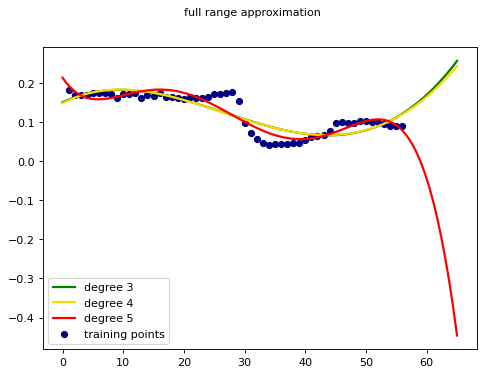

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

y = (Y_actual_)
# generate points used to plot
x_plot = np.linspace(0, 65, 100)

# create matrix versions of these arrays

X_plot = x_plot[:, np.newaxis]

colors = [ 'green', 'gold', 'red']
lw = 2
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(normalize=False))
    model.fit(X[:], y[:])
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.suptitle('full range approximation', fontsize=10)
plt.legend(loc='lower left')

plt.show()

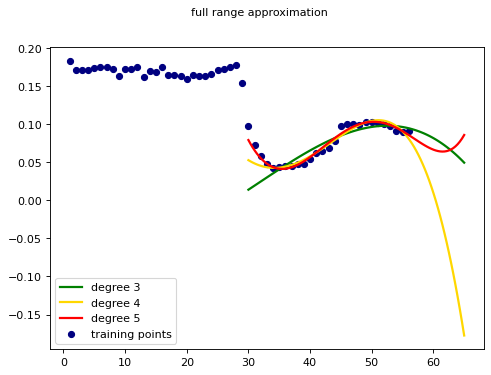

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

y = (Y_actual_)
# generate points used to plot
x_plot = np.linspace(30, 65, 100)

# create matrix versions of these arrays

X_plot = x_plot[:, np.newaxis]

colors = [ 'green', 'gold', 'red']
lw = 2
plt.figure(figsize=(7, 5), dpi=80)
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(normalize=False))
    model.fit(X[32:], y[32:])
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.suptitle('full range approximation', fontsize=10)
plt.legend(loc='lower left')

plt.show()

## Conclusion

    The reason we choose to use only part of the source data is that we could see that the airline traffic data prior weeek 26 is the ordinary thorought before the covid 19.
    
    While during the period of week 26 and week 31, the traffic dropped sharply due to the break news of covid 19 cases happened in USA.
    
    So the training data would be only appropriate for study for the range of week 32 to week 56.
    
    After training, use the model to predict the airline traffic in USA for 10 weeks in total, and corresponding to the real traffic diagram below, we could see that the result is matching the real situation.
    
    We ignore the DEGREE 3 option as the starting part of the segment does not align with the real training data.
    
    We ignore the DEGREE 4 option as the predicting part is getting a bit over determined.
    
    Thus, as described in the diagram, the traffic thorought in the next 10 weeks should be approximately the same, which a trend to recover!
    

## for validation purpose: we look at data AFTER 2020-08-30
 https://www.statista.com/statistics/1104036/novel-coronavirus-weekly-flights-change-airlines-region/
 

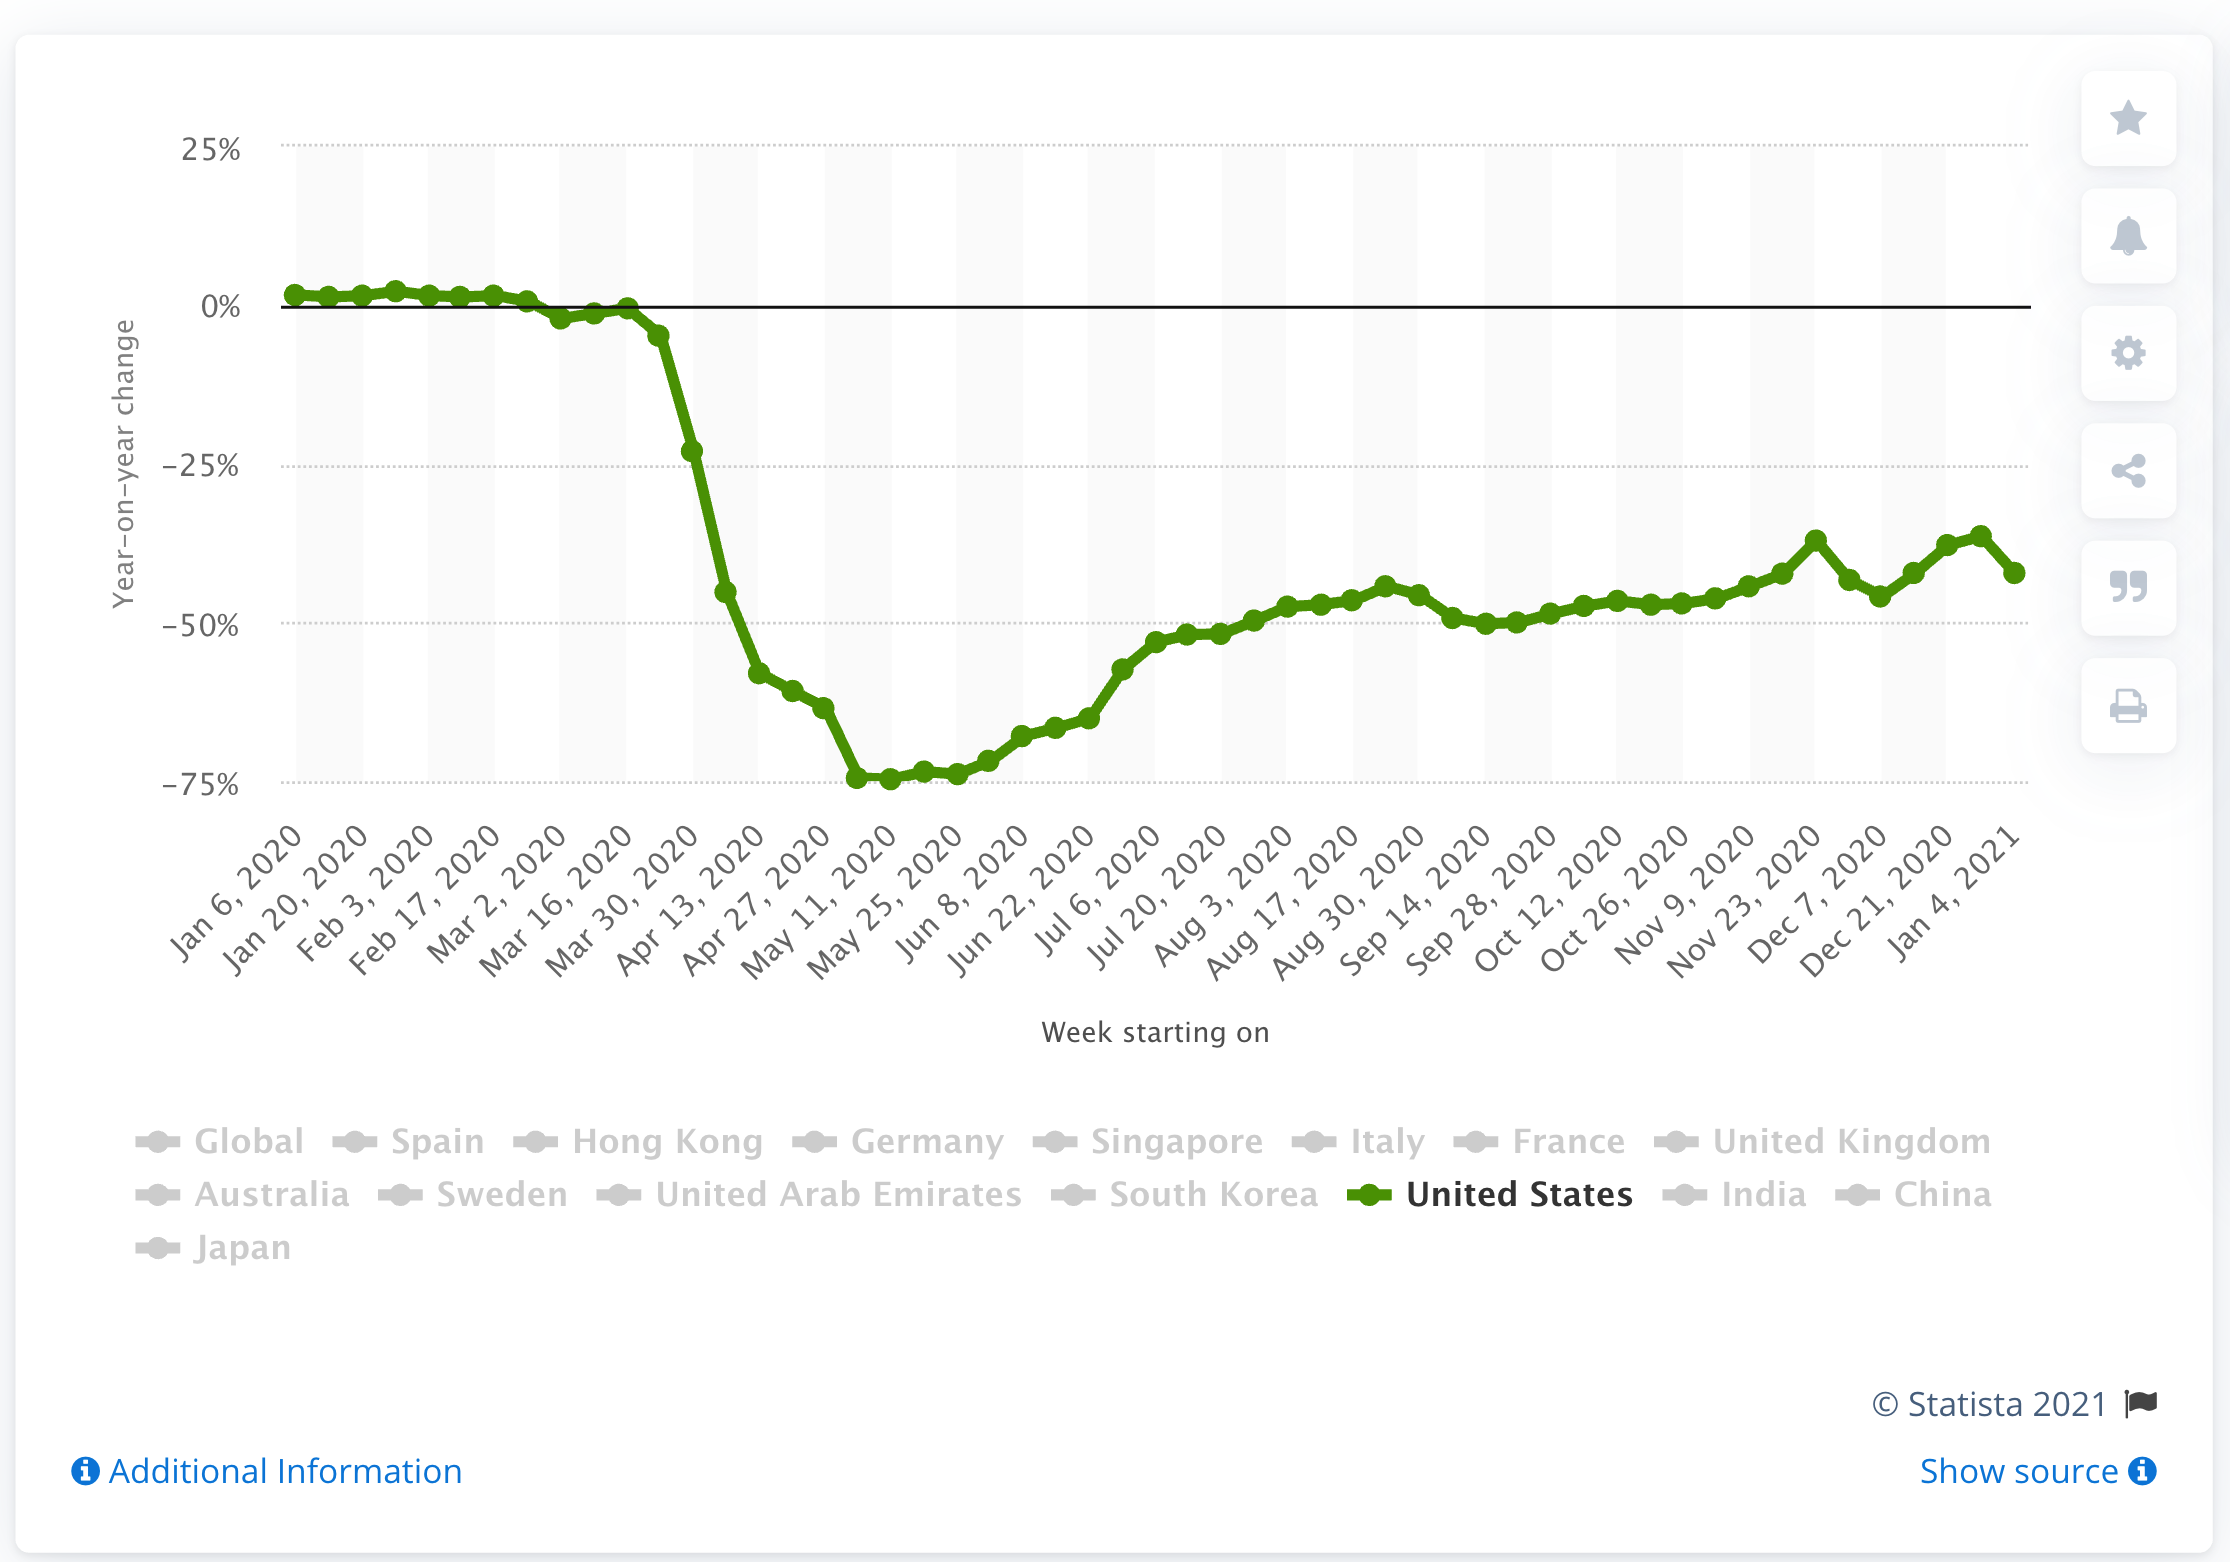

In [17]:
from IPython.display import Image
Image(filename="validation.png")